In [7]:
# 1: installing r packages
install.packages("car") # for outlierTest and multicollinearity test 
install.packages("ggeffects") # for margin plot 
install.packages("effects") # for margin plot 

Warning message in install.packages("car"):
“'lib = "/opt/R/4.2.2/lib/R/library"' is not writable”


ERROR: Error in install.packages("car"): unable to install packages


In [32]:
# loading installed r package
library(dplyr)
library(tidyverse)
library(readr)
library(skimr)
library(tableone)
library(car)
library(ggeffects)
library(effects)

ERROR: Error in library(skimr): there is no package called ‘skimr’


In [4]:
# 2: read data
lc = "../SMC/smc_bmi_dm.csv"
data = read.csv(lc, header = TRUE)
head(data)

,id,date,age,sex,bmi,height,weight,wc,fbs,hba1c,smk_status,alc_status,alc_amount_grams,egfr,visit
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,1,2004-03-30,30,2,19.83515,163.0,52.7,NA,90,4.7,1,1,888.00000,100.77025,1
2,1,2005-05-19,31,2,20.07734,164.0,54.0,73,83,5.1,1,1,888.00000,84.33963,2
3,1,2008-02-05,34,2,19.77324,163.1,52.6,NA,77,5.1,NA,NA,NA,82.58086,3
4,1,2009-03-19,35,2,20.51189,163.6,54.9,NA,84,5.3,1,3,90.51425,87.80133,4
5,1,2010-04-08,36,2,19.56213,164.6,53.0,NA,91,5.7,NA,NA,NA,99.65330,5
6,1,2011-03-30,37,2,20.06698,164.8,54.5,NA,100,5.4,NA,NA,NA,97.42397,6


In [9]:
# modify the data set 
data$id <- as.character(data$id)
head(data)

bmi_dm <- data %>% filter(visit==1 & !is.na(bmi)& !is.na(fbs))
head(bmi_dm)

,id,date,age,sex,bmi,height,weight,wc,fbs,hba1c,smk_status,alc_status,alc_amount_grams,egfr,visit
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,1,2004-03-30,30,2,19.83515,163.0,52.7,NA,90,4.7,1,1,888.00000,100.77025,1
2,1,2005-05-19,31,2,20.07734,164.0,54.0,73,83,5.1,1,1,888.00000,84.33963,2
3,1,2008-02-05,34,2,19.77324,163.1,52.6,NA,77,5.1,NA,NA,NA,82.58086,3
4,1,2009-03-19,35,2,20.51189,163.6,54.9,NA,84,5.3,1,3,90.51425,87.80133,4
5,1,2010-04-08,36,2,19.56213,164.6,53.0,NA,91,5.7,NA,NA,NA,99.65330,5
6,1,2011-03-30,37,2,20.06698,164.8,54.5,NA,100,5.4,NA,NA,NA,97.42397,6


,id,date,age,sex,bmi,height,weight,wc,fbs,hba1c,smk_status,alc_status,alc_amount_grams,egfr,visit
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
1,1,2004-03-30,30,2,19.83515,163.0,52.7,NA,90,4.7,1,1,888.00000,100.77025,1
2,2,2004-12-28,54,1,27.50865,170.0,79.5,NA,93,5.0,NA,NA,NA,81.96671,1
3,3,2005-01-12,48,1,23.94464,170.0,69.2,NA,144,NA,NA,3,45.25713,78.96206,1
4,4,2005-10-18,62,1,24.24242,165.0,66.0,NA,96,5.5,NA,3,57.60000,70.78745,1
5,5,2007-09-04,46,2,19.40458,160.2,49.8,68,91,5.3,1,1,888.00000,90.05759,1
6,6,2005-10-22,36,2,21.71126,158.0,54.2,NA,88,5.2,1,1,888.00000,111.82410,1


In [10]:
# 3: generate new variables

bmi_dm$bmi_cat <- ifelse(bmi_dm$bmi <18.5, 1, 
                         ifelse(bmi_dm$bmi >=18.5 & bmi_dm$bmi <23, 2,
                                ifelse(bmi_dm$bmi>=23 & bmi_dm$bmi <25 , 3, 4)))
table(bmi_dm$bmi_cat, useNA = "ifany")


    1     2     3     4 
 6045 62747 41093 49724 

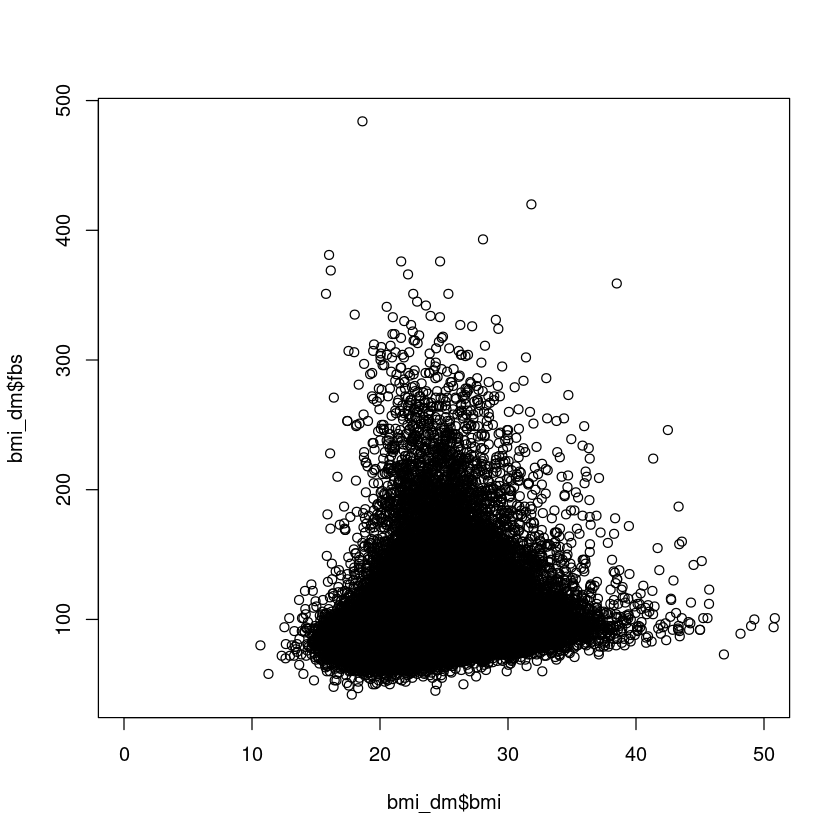

In [11]:
# 4: linear regression
#---- univariable
#-- continuous exposure
#-plot
plot(y=bmi_dm$fbs, x=bmi_dm$bmi, xlim=c(0,50))

In [43]:
#-linear regression
model1=lm(fbs~bmi, data=bmi_dm)
abline(model1)

summary(model1)
confint(model1)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


In [33]:
bmi_dm$pred_fbs <-fitted(model1) # get the prediction values from the model
bmi_dm$diff_fbs <-(bmi_dm$fbs -bmi_dm$pred_fbs) # calculate residual 
bmi_dm %>% select(id, fbs, pred_fbs,diff_fbs, bmi) # please compare predicted fbs to the original fbs
bmi_dm %>% select(id, fbs, pred_fbs,diff_fbs, bmi) %>% filter(bmi>=23.56 & bmi<23.6) # participants who had same bmi have same prediction value 

outlierTest(model1)

id,fbs,pred_fbs,diff_fbs,bmi
<chr>,<int>,<dbl>,<dbl>,<dbl>
1,90,94.39623,-4.3962252,19.83515
2,93,94.39685,-1.3968526,27.50865
3,144,94.39656,49.6034388,23.94464
4,96,94.39659,1.6034145,24.24242
5,91,94.39619,-3.3961900,19.40458
6,88,94.39638,-6.3963786,21.71126
7,80,94.39641,-14.3964103,22.09959
8,90,94.39686,-4.3968567,27.55969
9,95,94.39633,0.6036697,21.12029


id,fbs,pred_fbs,diff_fbs,bmi
<chr>,<int>,<dbl>,<dbl>,<dbl>
128,93,94.39653,-1.3965300,23.56281
261,92,94.39653,-2.3965325,23.59398
359,94,94.39653,-0.3965319,23.58634
383,88,94.39653,-6.3965300,23.56281
536,109,94.39653,14.6034699,23.56401
558,83,94.39653,-11.3965301,23.56401
691,82,94.39653,-12.3965329,23.59862
863,105,94.39653,10.6034685,23.58127
877,97,94.39653,2.6034703,23.56003


ERROR: Error in outlierTest(model1): could not find function "outlierTest"


In [13]:
# if we had extrim error values 
bmi_dm$bmi[bmi_dm$id=="11434"] <-99999 
model1_bad<-lm(fbs~bmi, data=bmi_dm)
abline(model1_bad)

summary(model1_bad)
confint(model1_bad)

bmi_dm$bmi[bmi_dm$id=="11434"] <-23.56281

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


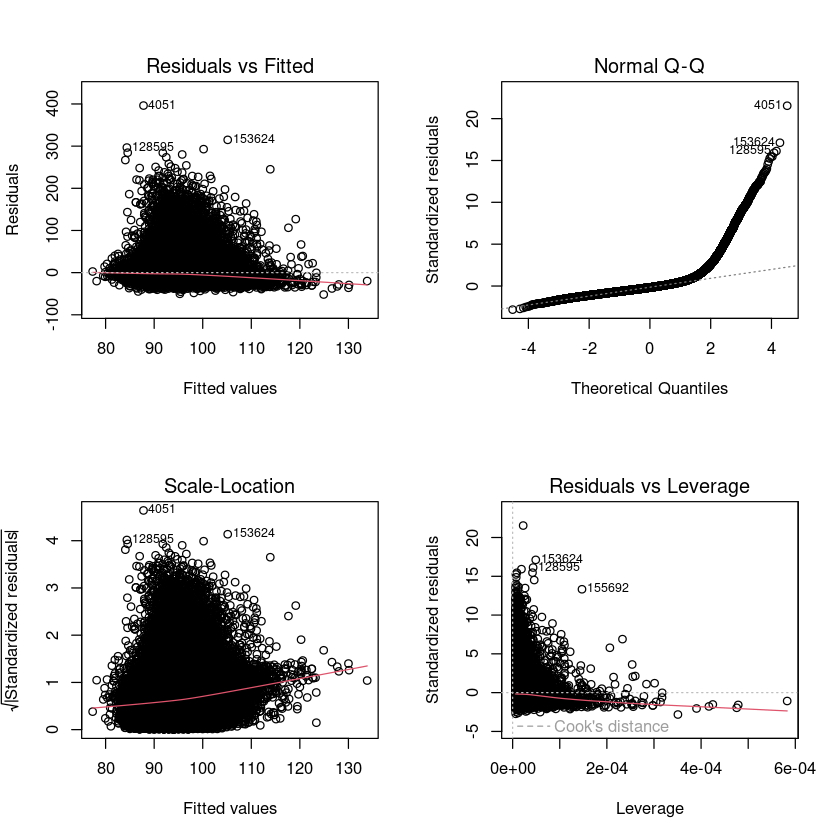

In [14]:
#-assumption test
par(mfrow = c(2, 2))
plot(model1)

In [15]:
#-categorical exposure
bmi_dm$bmi_cat <-as.factor(bmi_dm$bmi_cat)
levels(bmi_dm$bmi_cat)
model2<-lm(fbs~ bmi_cat , data=bmi_dm)
summary(model2)
confint(model2)

[1] "1" "2" "3" "4"


Call:
lm(formula = fbs ~ bmi_cat, data = bmi_dm)

Residuals:
   Min     1Q Median     3Q    Max 
-50.30  -9.30  -3.17   4.13 393.13 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  86.1682     0.2374  362.96   <2e-16 ***
bmi_cat2      4.7056     0.2486   18.93   <2e-16 ***
bmi_cat3      9.1269     0.2543   35.90   <2e-16 ***
bmi_cat4     12.9315     0.2514   51.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.46 on 159605 degrees of freedom
Multiple R-squared:  0.04094,	Adjusted R-squared:  0.04092 
F-statistic:  2271 on 3 and 159605 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),85.702935,86.633541
bmi_cat2,4.218355,5.192758
bmi_cat3,8.628544,9.625251
bmi_cat4,12.438757,13.424308


In [16]:
# reference change
model3<-lm(fbs~ C(bmi_cat,base=2) , data=bmi_dm)
model3<-lm(fbs~ relevel(bmi_cat,ref=2) , data=bmi_dm)
summary(model3)
confint(model3)


Call:
lm(formula = fbs ~ relevel(bmi_cat, ref = 2), data = bmi_dm)

Residuals:
   Min     1Q Median     3Q    Max 
-50.30  -9.30  -3.17   4.13 393.13 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                90.87379    0.07369 1233.25   <2e-16 ***
relevel(bmi_cat, ref = 2)1 -4.70556    0.24857  -18.93   <2e-16 ***
relevel(bmi_cat, ref = 2)3  4.42134    0.11713   37.75   <2e-16 ***
relevel(bmi_cat, ref = 2)4  8.22598    0.11082   74.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.46 on 159605 degrees of freedom
Multiple R-squared:  0.04094,	Adjusted R-squared:  0.04092 
F-statistic:  2271 on 3 and 159605 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),90.729371,91.018218
"relevel(bmi_cat, ref = 2)1",-5.192758,-4.218355
"relevel(bmi_cat, ref = 2)3",4.191760,4.650922
"relevel(bmi_cat, ref = 2)4",8.008768,8.443184


In [17]:
#---- multivariable
# multivariable linear regression
model4<-lm(fbs~ bmi+age+sex , data=bmi_dm)
summary(model4)
confint(model4)
ggeffect(model4, c( "bmi")) %>% plot
ggeffect(model4, c( "bmi", "sex[1,2]")) %>% plot

bmi_dm$smk_status <-as.factor(bmi_dm$smk_status)
model5=lm(fbs~ bmi+age+sex+smk_status , data=bmi_dm)
model5=lm(fbs~ bmi+age+sex+C(smk_status,base=3) , data=bmi_dm)
summary(model5)
confint(model5)

bmi_dm$smk_status <-as.numeric(bmi_dm$smk_status)
bmi_dm$smk_status[is.na(bmi_dm$smk_status)] <- 999
table(bmi_dm$smk_status)
bmi_dm$smk_status <-as.factor(bmi_dm$smk_status)

model6=lm(fbs~ bmi+age+sex+smk_status , data=bmi_dm)
model6=lm(fbs~ bmi+age+sex+C(smk_status,base=1) , data=bmi_dm)
summary(model6)
confint(model6)


Call:
lm(formula = fbs ~ bmi + age + sex, data = bmi_dm)

Residuals:
   Min     1Q Median     3Q    Max 
-57.59  -9.03  -2.89   4.15 393.26 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.2302227  0.2520077 342.173   <2e-16 ***
bmi         -0.0000284  0.0001813  -0.157    0.876    
age          0.3615811  0.0041892  86.312   <2e-16 ***
sex         -6.4228003  0.0910439 -70.546   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.13 on 159605 degrees of freedom
Multiple R-squared:  0.07494,	Adjusted R-squared:  0.07493 
F-statistic:  4310 on 3 and 159605 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),85.7362928342,86.7241524858
bmi,-0.0003837656,0.0003269713
age,0.3533703246,0.3697918471
sex,-6.6012444267,-6.2443561233


ERROR: Error in ggeffect(model4, c("bmi")): could not find function "ggeffect"


In [21]:
# multicollinearity test 
vif(model6)

ERROR: Error in vif(model6): could not find function "vif"


In [ ]:
# interaction 
model7=lm(fbs~ bmi*sex + age , data=bmi_dm)
summary(model7)
confint(model7)

ggeffect(model7, c( "bmi", "sex[1,2]")) %>% plot


# END